In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
import librosa
import scipy
from spafe.features.gfcc import gfcc
import os
import warnings
warnings.filterwarnings('ignore')

my_seed = 146
np.random.seed(my_seed)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [47]:
audio1 = 'audio/Alesis-Fusion-Bright-Acoustic-Piano-C4.wav'
audio2 = 'audio/Alesis-Fusion-Clean-Guitar-C3.wav'


samplerate1, data1 = wavfile.read(audio1)
data1 = data1[:, 0]
print('Sampling Rate:',samplerate1)
print('Audio Shape:',np.shape(data1))

samplerate2, data2 = wavfile.read(audio2)
data2 = data2[:, 0]
print('Sampling Rate:',samplerate2)
print('Audio Shape:',np.shape(data2))

Sampling Rate: 44100
Audio Shape: (130786,)
Sampling Rate: 44100
Audio Shape: (196783,)


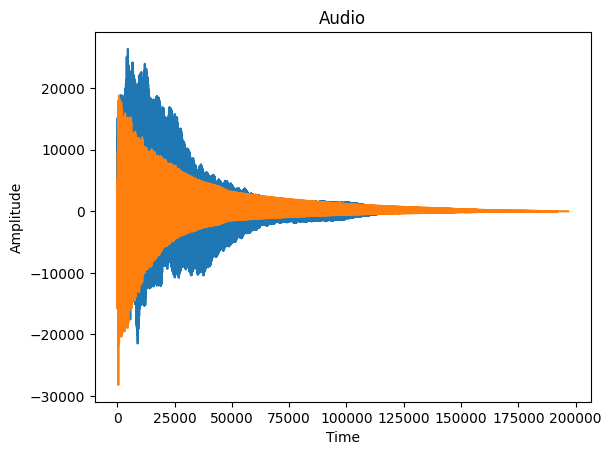

In [48]:
plt.plot(data1)
plt.plot(data2)
plt.title('Audio')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

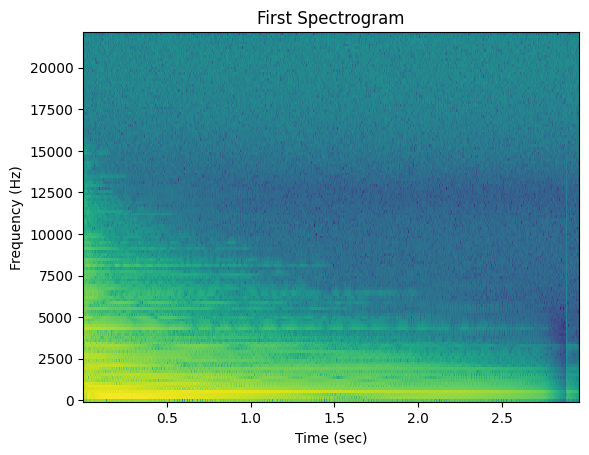

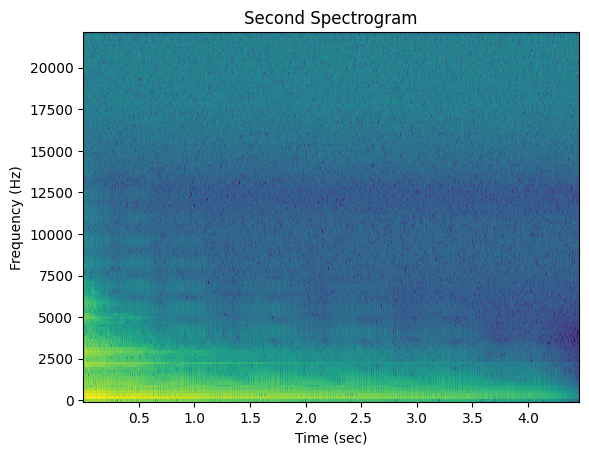

In [49]:
adata1 = data1[:]
s1 = samplerate1

fr, tm, spgram = signal.spectrogram(adata1,s1)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.title('First Spectrogram')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

adata2 = data2[:]
s2 = samplerate2

fr, tm, spgram = signal.spectrogram(adata2,s2)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.title('Second Spectrogram')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

In [50]:
sample1, sr1 = librosa.load("audio/Alesis-Fusion-Bright-Acoustic-Piano-C4.wav")
sample2, sr2 = librosa.load("audio/Alesis-Fusion-Clean-Guitar-C3.wav")

mfccs1 = librosa.feature.mfcc(y=sample1, sr=sr1, n_mfcc=10)
S1 = librosa.feature.melspectrogram(y=sample1, sr=sr1, n_mels=128, fmax=20000)

mfccs2 = librosa.feature.mfcc(y=sample2, sr=sr2, n_mfcc=10)
S2 = librosa.feature.melspectrogram(y=sample2, sr=sr2, n_mels=128, fmax=20000)

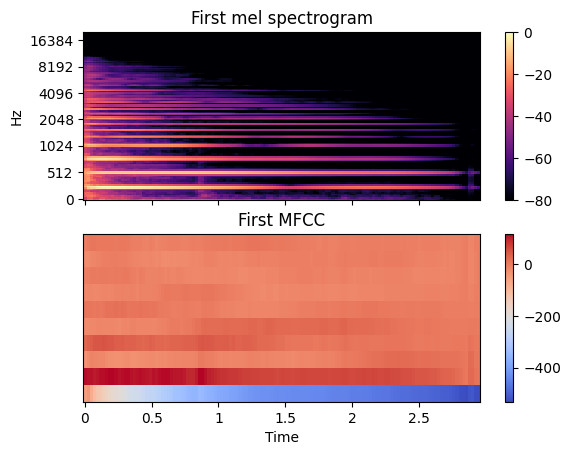

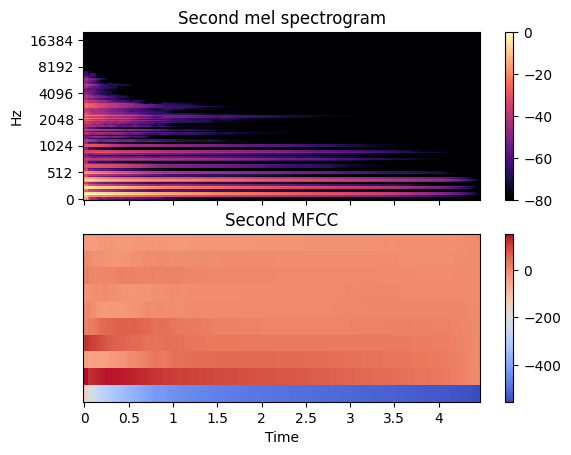

In [52]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S1, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=20000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='First mel spectrogram')
ax[0].label_outer()

img = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='First MFCC')

fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S2, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=20000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Second mel spectrogram')
ax[0].label_outer()

img = librosa.display.specshow(mfccs2, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='Second MFCC')
plt.show()

In [53]:
gfccs1 = gfcc(sample1, fs=sr1, num_ceps=15)
gfccs2 = gfcc(sample2, fs=sr2, num_ceps=15)

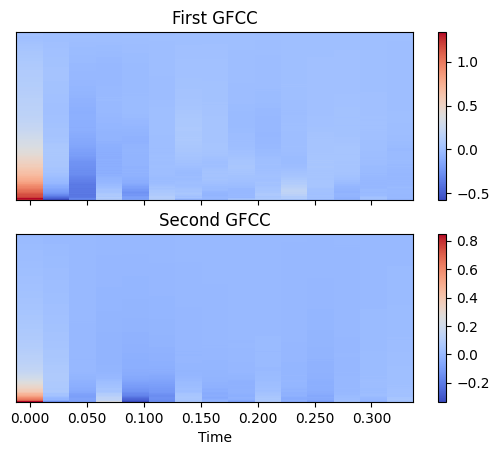

In [54]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(gfccs1,
                               x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='First GFCC')
ax[0].label_outer()

img = librosa.display.specshow(gfccs2,
                               x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='Second GFCC')
ax[1].label_outer()
plt.show()

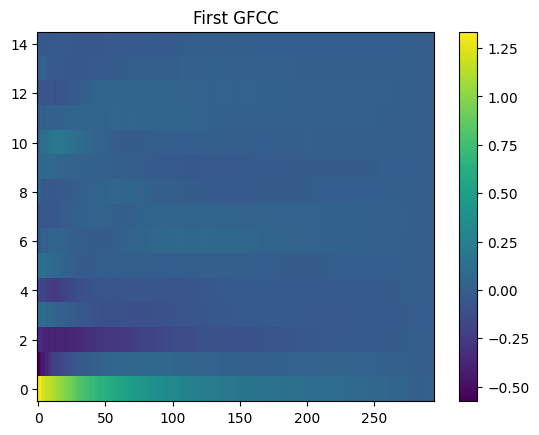

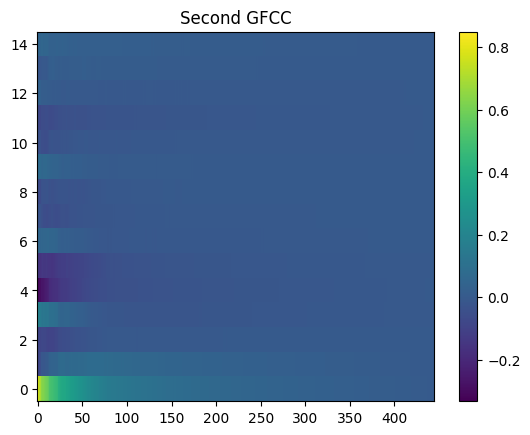

In [55]:
plt.imshow(gfccs1.T, aspect='auto', origin='lower', cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('First GFCC')
plt.show()

plt.imshow(gfccs2.T, aspect='auto', origin='lower', cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Second GFCC')
plt.show()